<a href="https://colab.research.google.com/github/muriloufu/Hydrocyclone_ANN/blob/main/Vieira_2006_HC_Melhorado_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [556]:
#bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from google.colab import files
import numpy as np
import io
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from google.colab import files

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
%matplotlib inline

In [557]:
#selecao do dataset
path = 'https://github.com/muriloufu/Hydrocyclone_ANN/raw/main/Tese_LG_2006_01.xlsx'
df = pd.read_excel(path)
df

,Di,Do,L,Teta,RL,Eu,Etta
0,4.8,6.6,142,11.2,28.28,4493,65.18
1,4.8,6.6,142,17.8,29.30,4407,61.76
2,4.8,6.6,207,11.2,31.80,3997,72.47
3,4.8,6.6,207,17.8,31.20,3664,62.23
4,4.8,9.6,142,11.2,10.24,3697,54.06
5,4.8,9.6,142,17.8,10.50,3211,47.30
6,4.8,9.6,207,11.2,15.04,3257,61.52
7,4.8,9.6,207,17.8,17.16,3016,54.30
8,7.8,6.6,142,11.2,29.00,2416,74.59
9,7.8,6.6,142,17.8,33.00,1789,69.00


In [558]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        x[i]=2*((x[i]-min_x)/(max_x-min_x))-1
    return x

In [559]:
# funcao retorna os dados a forma original - xi ISOLADO DA FUNCAO: NORMATIZA(X)
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        x[i]=((x[i]+1)/2)*(max_x-min_x)+min_x
    return x

In [560]:
DAT_OLD=[] #Criar um dataframe em branco
DAT_OLD=df.copy() #No dataframe em branco esta colocando os dados de df (dataframe que chamou no inicio)
DAT=Normatiza(df) #No dataframe DAT coloca o dataframe df normatizado

In [561]:
DAT #mostra o dataframe DAT que é o df normatizado

,Di,Do,L,Teta,RL,Eu,Etta
0,-6.250000e-01,-6.250000e-01,-0.549550,-0.6,0.117028,0.285241,0.215087
1,-6.250000e-01,-6.250000e-01,-0.549550,0.6,0.180186,0.253589,-0.017329
2,-6.250000e-01,-6.250000e-01,0.621622,-0.6,0.334985,0.102687,0.710499
3,-6.250000e-01,-6.250000e-01,0.621622,0.6,0.297833,-0.019875,0.014611
4,-6.250000e-01,6.250000e-01,-0.549550,-0.6,-1.000000,-0.007729,-0.540605
5,-6.250000e-01,6.250000e-01,-0.549550,0.6,-0.983901,-0.186603,-1.000000
6,-6.250000e-01,6.250000e-01,0.621622,-0.6,-0.702786,-0.169672,-0.033639
7,-6.250000e-01,6.250000e-01,0.621622,0.6,-0.571517,-0.258373,-0.524295
8,6.250000e-01,-6.250000e-01,-0.549550,-0.6,0.161610,-0.479205,0.854570
9,6.250000e-01,-6.250000e-01,-0.549550,0.6,0.409288,-0.709974,0.474686


In [562]:
#dividindo randomicamente os dados de DAT em treino e teste
train=DAT.iloc[[0,1,2,3,5,6,7,8,9,10,11,12,14,15,16,17,20,21,22,23],:]
test=DAT.iloc[[4,13,18,19,24],:]
#train=DAT.sample(frac=0.8,random_state=None)
#test=DAT.drop(train.index)

In [563]:
#Definindo as variaveis independentes
x_train=train.iloc[:,[0,1,2,3]]
x_test=test.iloc[:,[0,1,2,3]]
X_OLD=DAT_OLD.iloc[:,[0,1,2,3]]

In [564]:
#variaveis independentes de treino e teste
print(x_train)
print (x_test)

              Di            Do         L  Teta
0  -6.250000e-01 -6.250000e-01 -0.549550  -0.6
1  -6.250000e-01 -6.250000e-01 -0.549550   0.6
2  -6.250000e-01 -6.250000e-01  0.621622  -0.6
3  -6.250000e-01 -6.250000e-01  0.621622   0.6
5  -6.250000e-01  6.250000e-01 -0.549550   0.6
6  -6.250000e-01  6.250000e-01  0.621622  -0.6
7  -6.250000e-01  6.250000e-01  0.621622   0.6
8   6.250000e-01 -6.250000e-01 -0.549550  -0.6
9   6.250000e-01 -6.250000e-01 -0.549550   0.6
10  6.250000e-01 -6.250000e-01  0.621622  -0.6
11  6.250000e-01 -6.250000e-01  0.621622   0.6
12  6.250000e-01  6.250000e-01 -0.549550  -0.6
14  6.250000e-01  6.250000e-01  0.621622  -0.6
15  6.250000e-01  6.250000e-01  0.621622   0.6
16 -1.000000e+00 -2.220446e-16  0.027027   0.0
17  1.000000e+00 -2.220446e-16  0.027027   0.0
20  2.220446e-16 -2.220446e-16 -1.000000   0.0
21  2.220446e-16 -2.220446e-16  1.000000   0.0
22  2.220446e-16 -2.220446e-16  0.027027  -1.0
23  2.220446e-16 -2.220446e-16  0.027027   1.0
             

In [565]:
#definindo as variáveis dependentes
y_train=train.iloc[:,[4,5,6]]
y_test=test.iloc[:,[4,5,6]]
Y_OLD=DAT_OLD.iloc[:,[4,5,6]]
print(y_train)
print(y_test)

          RL        Eu      Etta
0   0.117028  0.285241  0.215087
1   0.180186  0.253589 -0.017329
2   0.334985  0.102687  0.710499
3   0.297833 -0.019875  0.014611
5  -0.983901 -0.186603 -1.000000
6  -0.702786 -0.169672 -0.033639
7  -0.571517 -0.258373 -0.524295
8   0.161610 -0.479205  0.854570
9   0.409288 -0.709974  0.474686
10  0.389474 -0.784321  0.700306
11  0.330031 -0.828487  0.094122
12 -0.952941 -0.750460  0.462453
14 -0.609907 -0.974236  0.027523
15 -0.631579 -1.000000 -0.378865
16 -0.667492  1.000000  0.056065
17 -0.463777 -0.960250 -0.113150
20 -0.665015 -0.358484 -0.435270
21 -0.388854 -0.807140 -0.872919
22 -0.382043 -0.542142  0.096840
23 -0.583901 -0.705558 -0.059463
          RL        Eu      Etta
4  -1.000000 -0.007729 -0.540605
13 -0.760991 -0.935223 -0.148488
18  1.000000 -0.313581  1.000000
19 -0.864396 -0.753404  0.270812
24 -0.550464 -0.667648  0.049269


In [566]:
#define a rede neural
#nessa rede vao ser usados 3 camadas: Input + hidden + output
#o numero de neuronios na hidden eh arbitrario. O artigo fez 12 neuronios nessa camada
#uncao de ativicao eh a logistic, segundo o artigo
model = MLPRegressor(random_state=1,solver='lbfgs',activation='tanh', learning_rate = 'adaptive', alpha=1e-5, 
                     hidden_layer_sizes= tuple(100 for _ in range(10)))



In [567]:
#treina a rede neural
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100,
                                 100),
             learning_rate='adaptive', learning_rate_init=0.001, max_fun=15000,
             max_iter=200, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
             solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [568]:
#usa a rede neural para treino e teste
y_calc_train=model.predict(x_train)
y_calc_test=model.predict(x_test)

In [569]:
#transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [570]:
#Desnormatizar os dados obtidos da rede neural
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [571]:
#recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [572]:
#Resposta para fazer o grafico (RL-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['RL'].copy()
resist_obs_train=train['RL'].copy()

In [573]:
#Resposta para fazer o grafico (RL-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['RL'].copy()
resist_obs_test=test['RL'].copy()

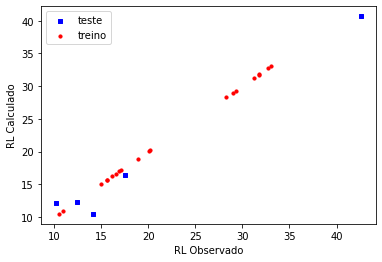

In [574]:
#expressa os dois dados em figura - ETTA
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('RL Calculado')
plt.xlabel('RL Observado')
plt.show()

In [575]:
#checar a qualidade da regressao PARA TESTE
mse_RL=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste_RL=",mse_RL)
R2_RL=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste_RL=",R2_RL)

MSE teste_RL= 4.252363523747468
R^2 teste_RL= 0.969610297216848


In [576]:
#checar a qualidade da regressao PARA TREINO
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 0.0006751615111578271
R^2 treino= 0.9999883943395879


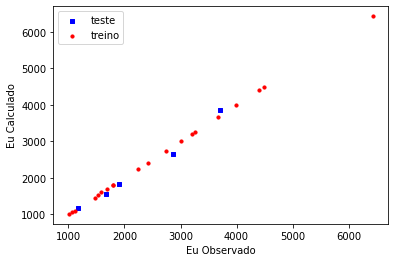

MSE teste_Eu= 18174.156443174485
R^2 teste_Eu= 0.977720683418743
MSE treino= 77.85412094277494
R^2 treino= 0.9999595395598552


In [577]:
#Resposta para fazer o grafico (Eu-treino)
resist_obs_train_Eu=[]
resist_calc_train_Eu=[]
resist_calc_train_Eu=y_calc_train['Eu'].copy()
resist_obs_train_Eu=train['Eu'].copy()

resist_obs_test_Eu=[]
resist_calc_test_Eu=[]
resist_calc_test_Eu=y_calc_test['Eu'].copy()
resist_obs_test_Eu=test['Eu'].copy()

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test_Eu,resist_calc_test_Eu, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train_Eu,resist_calc_train_Eu, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Eu Calculado')
plt.xlabel('Eu Observado')
plt.show()

#checar a qualidade da regressao PARA TESTE
mse_Eu=mean_squared_error(resist_obs_test_Eu,resist_calc_test_Eu)
print("MSE teste_Eu=",mse_Eu)
R2_Eu=r2_score(resist_obs_test_Eu,resist_calc_test_Eu)
print("R^2 teste_Eu=",R2_Eu)

#checar a qualidade da regressao PARA TREINO
mse_Eu=mean_squared_error(resist_obs_train_Eu,resist_calc_train_Eu)
print("MSE treino=",mse_Eu)
R2=r2_score(resist_obs_train_Eu,resist_calc_train_Eu)
print("R^2 treino=",R2)

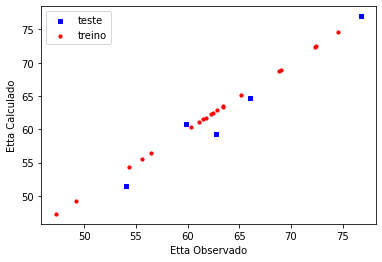

MSE teste_Etta= 4.244243125711231
R^2 teste_Etta= 0.9252118595335174
MSE treino_Etta= 0.00032124808636505004
R^2 treino_Etta= 0.9999935736559661


In [578]:
#Resposta para fazer o grafico (Etta-treino)
resist_obs_train_Etta=[]
resist_calc_train_Erra=[]
resist_calc_train_Etta=y_calc_train['Etta'].copy()
resist_obs_train_Etta=train['Etta'].copy()

resist_obs_test_Etta=[]
resist_calc_test_Etta=[]
resist_calc_test_Etta=y_calc_test['Etta'].copy()
resist_obs_test_Etta=test['Etta'].copy()

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test_Etta,resist_calc_test_Etta, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train_Etta,resist_calc_train_Etta, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Etta Calculado')
plt.xlabel('Etta Observado')
plt.show()

#checar a qualidade da regressao PARA TESTE
mse_Etta=mean_squared_error(resist_obs_test_Etta,resist_calc_test_Etta)
print("MSE teste_Etta=",mse_Etta)
R2_Etta=r2_score(resist_obs_test_Etta,resist_calc_test_Etta)
print("R^2 teste_Etta=",R2_Etta)

#checar a qualidade da regressao PARA TREINO
mse_Etta=mean_squared_error(resist_obs_train_Etta,resist_calc_train_Etta)
print("MSE treino_Etta=",mse_Etta)
R2=r2_score(resist_obs_train_Etta,resist_calc_train_Etta)
print("R^2 treino_Etta=",R2)

In [579]:
print("R^2 teste_RL=",R2_RL)

print("R^2 teste_Eu=",R2_Eu)

print("R^2 teste_Etta=",R2_Etta)

R^2 teste_RL= 0.969610297216848
R^2 teste_Eu= 0.977720683418743
R^2 teste_Etta= 0.9252118595335174
